## Final Project Submission 

Please fill out:
* Student name: Joan K Njoroge
* Student pace: full time
* Scheduled project review date/time: 9/07/2023
* Instructor name: Veronica Isiaho
* Blog post URL: 


##* Introduction: Project Overview
The aim of this project is to advise clients, propoertyowners on the impact of various factors on house saleprices in King County Washington.

The outcomes will yield actionable insights to aimed to benefit stakeholders by:

* Sales growth will be facilitated by the insights gathered from the model, which will make it possible for NAR members to create plans to improve sales performance by identifying the major variables affecting house selling prices.


## Business Problem
* Analyze the effects of numerous property qualities to arrive at a property valuation
* Measure the profitability and potential regions for possible real estate investment possibilities.
* Determine which factors have the most impact on property values.


In [1]:
# import necassary libraries
import pandas as pd
import numpy as np

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scipy
import scipy.stats as stats

# rando
from itertools import combinations

#visualizations
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline


#load the data
raw_df = pd.read_csv('data/kc_house_data.csv')
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


##* Data Cleaning and Preparation:

This step is aimed at:
1. Identify range constraints.
2. Identify categorical constraints.
3. Identify inconsistencies in the data.
4. Visualize the data to easily find outliers and strange distributions.
5. Counting errors in the data.
6. Identify missing values and find sensible ways to deal with them.
7. Convert data types
8. Feature engineering to create new columns i.e `has_basement`

The main strategy is to have clean data for modelling by:
1. Removal if need be.
2. Direct correction.
3. Scaling the data making variables in line with each other while retaining the proportional relationships.
4. Imputation.

# Step 1: Detect missing values

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We are able to see that we have missing values in the `waterfront`, `view`, `yr_renovated` columns and will deal with each data type accordingly.

In [3]:
raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Exploring Categorical columns.

In [4]:
# objects in the dataset
objects_df = raw_df.select_dtypes(include=object)
objects_df

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


In [5]:
# find unique varibles and null values in the categorical data
for column in objects_df.columns:
    print(f"COLUMN name: '{column}'")
    print(f"No. of unique values: {len(objects_df[column].unique())}")
    print(f"No. of null values: {objects_df[column].isnull().sum()}")
    print(f"% of null values: {(objects_df[column].isnull().sum() / len(objects_df[column]) * 100) }")
    print(objects_df[column].value_counts(normalize=True))
    print()

COLUMN name: 'date'
No. of unique values: 372
No. of null values: 0
% of null values: 0.0
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
               ...   
7/27/2014    0.000046
5/17/2014    0.000046
5/24/2015    0.000046
5/27/2015    0.000046
11/2/2014    0.000046
Name: date, Length: 372, dtype: float64

COLUMN name: 'waterfront'
No. of unique values: 3
No. of null values: 2376
% of null values: 11.00152798999861
NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

COLUMN name: 'view'
No. of unique values: 6
No. of null values: 63
% of null values: 0.29170718155299347
NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

COLUMN name: 'condition'
No. of unique values: 5
No. of null values: 0
% of null values: 0.0
Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name

* The inconsistencies identified in the object_df are

|Variable       | Type       | values  | Strategy|
| :-----:       | :-----:    | :-----: | :-----: |
|`date`         | Categorical|* mm/dd/yyyy | 
|`waterfront`   | Boolean    | * YES/NO <br /> * 11% null values | * replace null values to 'NO' <br /> * Less than 1% of homes are waterfront, so we assume that NaN means no waterfront view,
|`view`         | Categorical|* 6 unique values <br />* 0.29% null values| fill null values with 'NONE'
|`condtion`     | Categorical|* 5 unique <br/>* 0 null | * map the variable to match the description
|`grade`        | Ordinal    |* 11 uniique <br /> * numeric value and desc. | clean the column to show numeric value and remove the description
|`sqft_basement`| Boolean    |* float <br /> * '?' placeholder <br /> * area cannot be 0.0sqft | * create column has_basement <br /> * values:1/0

#### Cleaning categorical data

1. `waterfront` column: change the column to 1 / 0 and fill those with NaN values to 0

In [6]:
# 1. replace `waterfront`` {np.nan:'NO'}
raw_df['waterfront'].replace({np.nan:'NO'}, inplace=True)

wtrfrnt = []
for val in raw_df['waterfront']:
    if val == 'NO':
        wtrfrnt.append('0')
    else:
        wtrfrnt.append('1')
        
raw_df['waterfront'] = wtrfrnt

#check
raw_df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

2. `view` column: fill null values with 'NONE'

In [7]:
# 2. change `view` null values to 'NONE'
raw_df['view'].fillna('NONE', inplace=True)

#check
raw_df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

3. `condition` column: map conditions to their numerical key-value pair


In [8]:
#Map condition column to numerical codes
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
raw_df['condition'] = raw_df['condition'].map(condition_mapping)

raw_df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

4. `grade` column: show numeric value and remove the description

In [9]:
# keep 'grade' as int and remove description
raw_df['grade'] = [int(grade[:2]) for grade in objects_df['grade']]

#check
raw_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

5. `sqft_basement` column: if value '0.0' or '?' append new column 0, else 1


In [10]:
basement = []
for sq_ft in raw_df['sqft_basement']:
    if sq_ft == '0.0':
        basement.append('0')
    elif sq_ft == '?':
        basement.append('0')
    else:
        basement.append('1')
        
raw_df['has_basement'] = basement

# drop `sqft_basement`
raw_df = raw_df.drop('sqft_basement', axis=1)

# check 
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


###* Creating dummy variables of categorical data

### Exploratory Data Analysis of Numerical data

1. Detecting outliers using boxplots


In [11]:
# Lets check for outliers. Lets plot our boxplot
# get all numerical columns

cols_cont_df = raw_df.select_dtypes(exclude = object).columns
cols_cont_df

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

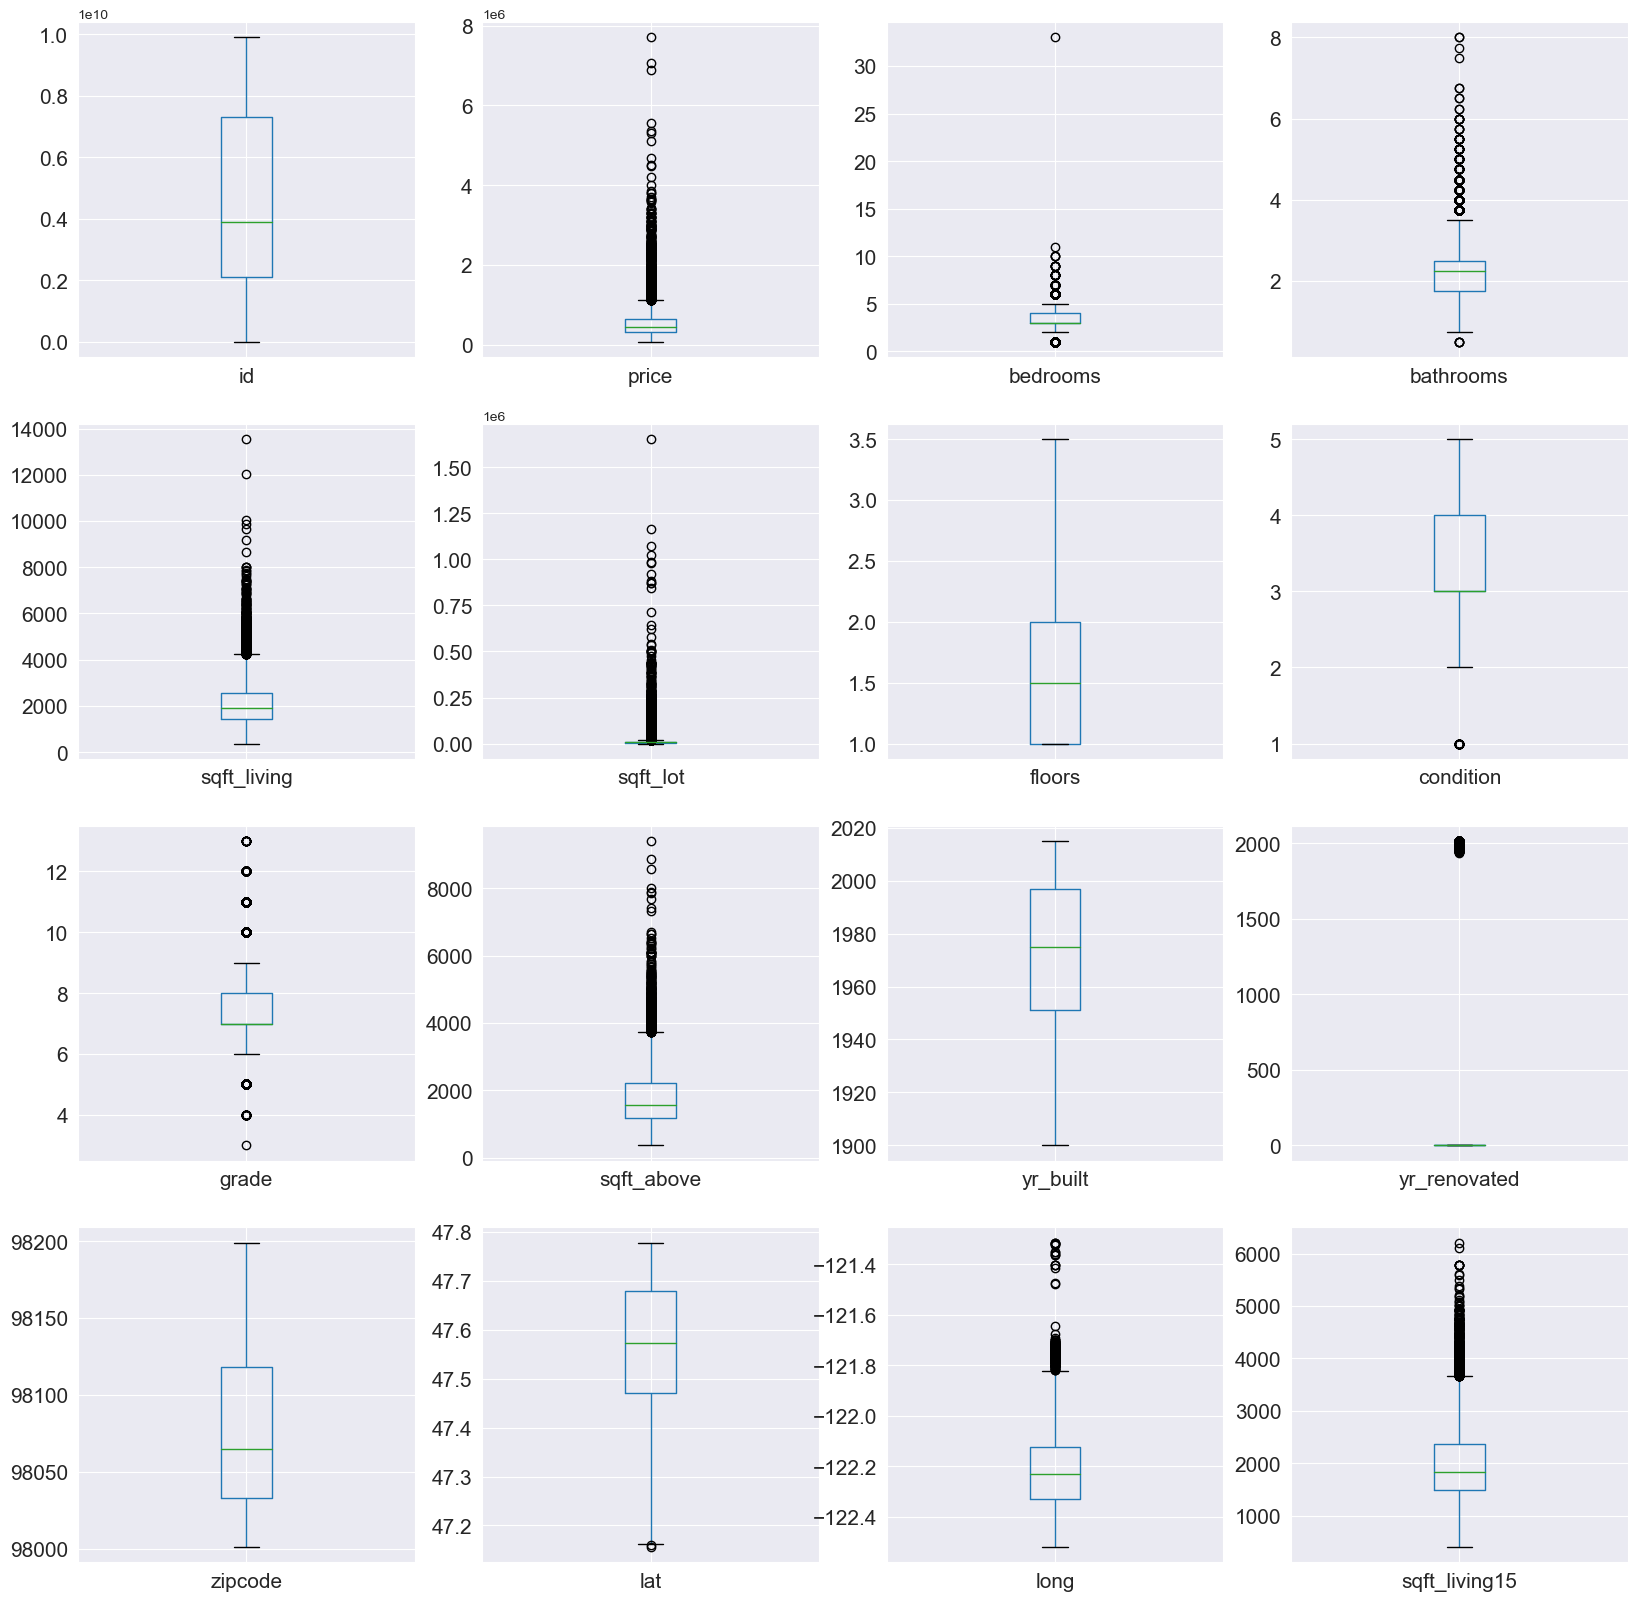

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (20,20))

index = 0
for row in range(len(axes)):
    for col in range(len(axes[row])):
        if index == len(cols_cont_df):
            break
        ax = axes[row][col]
        var = raw_df[[cols_cont_df[index]]]
        var.boxplot(fontsize = 15 , ax=ax)
        index += 1

Plotting individual boxplots allows to better see outliers as the different variables have differnt scaling.

Price appears to have many outliers. it would be necessary to see by how much the values deviate from the mean

In [13]:
# view metrics of price
raw_df.price.describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

In [14]:
# calculate the mode to see skewness
raw_df.price.mode()

0    350000.0
1    450000.0
dtype: float64

In [15]:
raw_df.price.median()

450000.0

* The min. price is 78000 USD which is sensible.
* The 50th percentile is much lower at 450000 USD.
* The max. price 7,700,000 USD which may be an outlier as there are mansions as well in the dataset. This may need further investigation.
* The mean is much lower than this and as thus would be necessary to set a threshold over values of the price that would minimise deviation which is as well quite high.

* It would be necessary to deal with these outliers in the price.

Skewness:  4.023085207745834
Kurtosis:  34.53308449607733


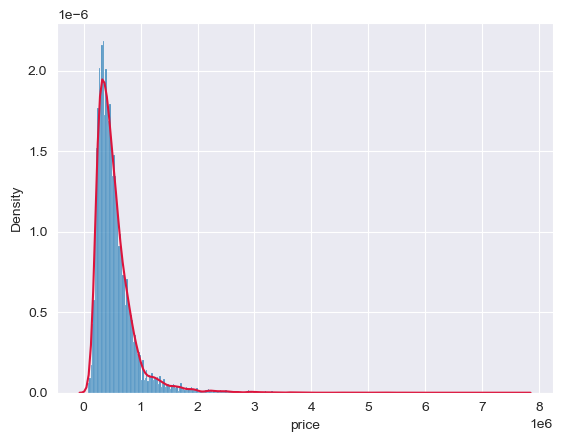

In [16]:
# plot histogram to see distribution and outliers in the `price` column
ax = sns.histplot(raw_df.price, kde=False, stat='density')
sns.kdeplot(data=raw_df, x="price", color='crimson', ax=ax)

print("Skewness: ", stats.skew(raw_df.price))
print("Kurtosis: ", stats.kurtosis(raw_df.price))

From the skinny distribution we can see that it would be incorrect to assume that the price is normally distributed. The leptokurtic distribution and high kurtosis of 34.53 means shows that there are outliers in the price column. 

It may be necessary to scale the price column. Implementing a Log Transform will help convert the leptokurtic distribtuion to a normal distribution.



Skewness:  0.43097424174908705
Kurtosis:  0.6906107356267648


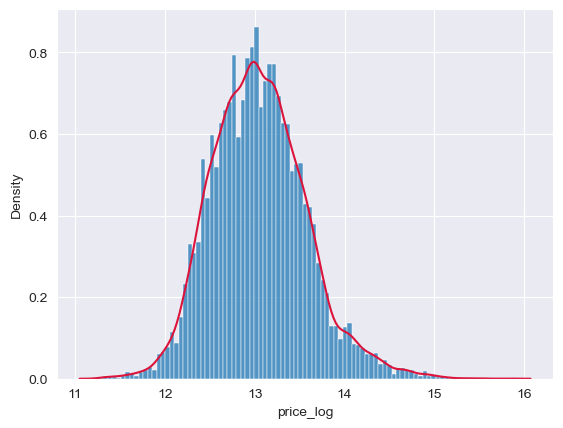

In [17]:
# overwrite the price column with the log price
raw_df['price_log'] = np.log(raw_df.price)

# plot the log price distribution to see if it became normal
ax = sns.histplot(raw_df.price_log, kde=False, stat='density')
sns.kdeplot(data=raw_df, x="price_log", color='crimson', ax=ax)

print("Skewness: ", stats.skew(raw_df.price_log))
print("Kurtosis: ", stats.kurtosis(raw_df.price_log))


<Axes: >

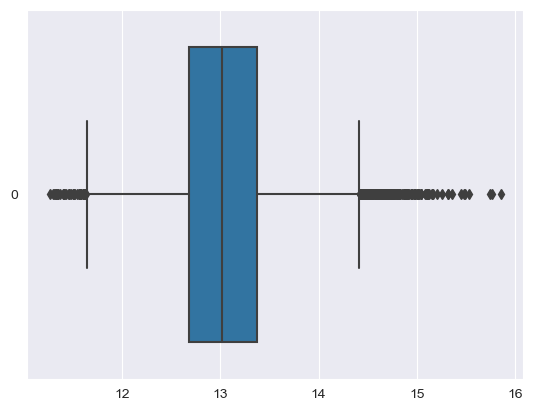

In [18]:
# boxplot to visualize noramlized price_log
sns.boxplot(raw_df.price_log, orient="h")

In [19]:
cont_df = raw_df.select_dtypes(exclude = object)
cont_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,3,8,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,12.793859
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,12.899220
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,12.904459
21595,291310100,400000.0,3,2.50,1600,2388,2.0,3,8,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,12.899220


Log transforming the price column allowed to retain more data and price is now normally distributed as seen in the histogram.
Although the boxplot still shows presence of some outliers these can be accounted for perharps as:
* The left whisker can be seen as the prices of delapidated old houses that may be low in value. This can also be calculated by use of `yr_built`, `yr_renovated` and `date` (age of the house) to compare `condition`, `grade`, `price`

* The right whisker can be seen as the prices of Very expensive apartments/ mansions/ hotels/ commercial buildings 

Plot scatter matrix to see if the variables have relation to price_log, detect for ordinal data. We assume linearity of the varibales to the price.

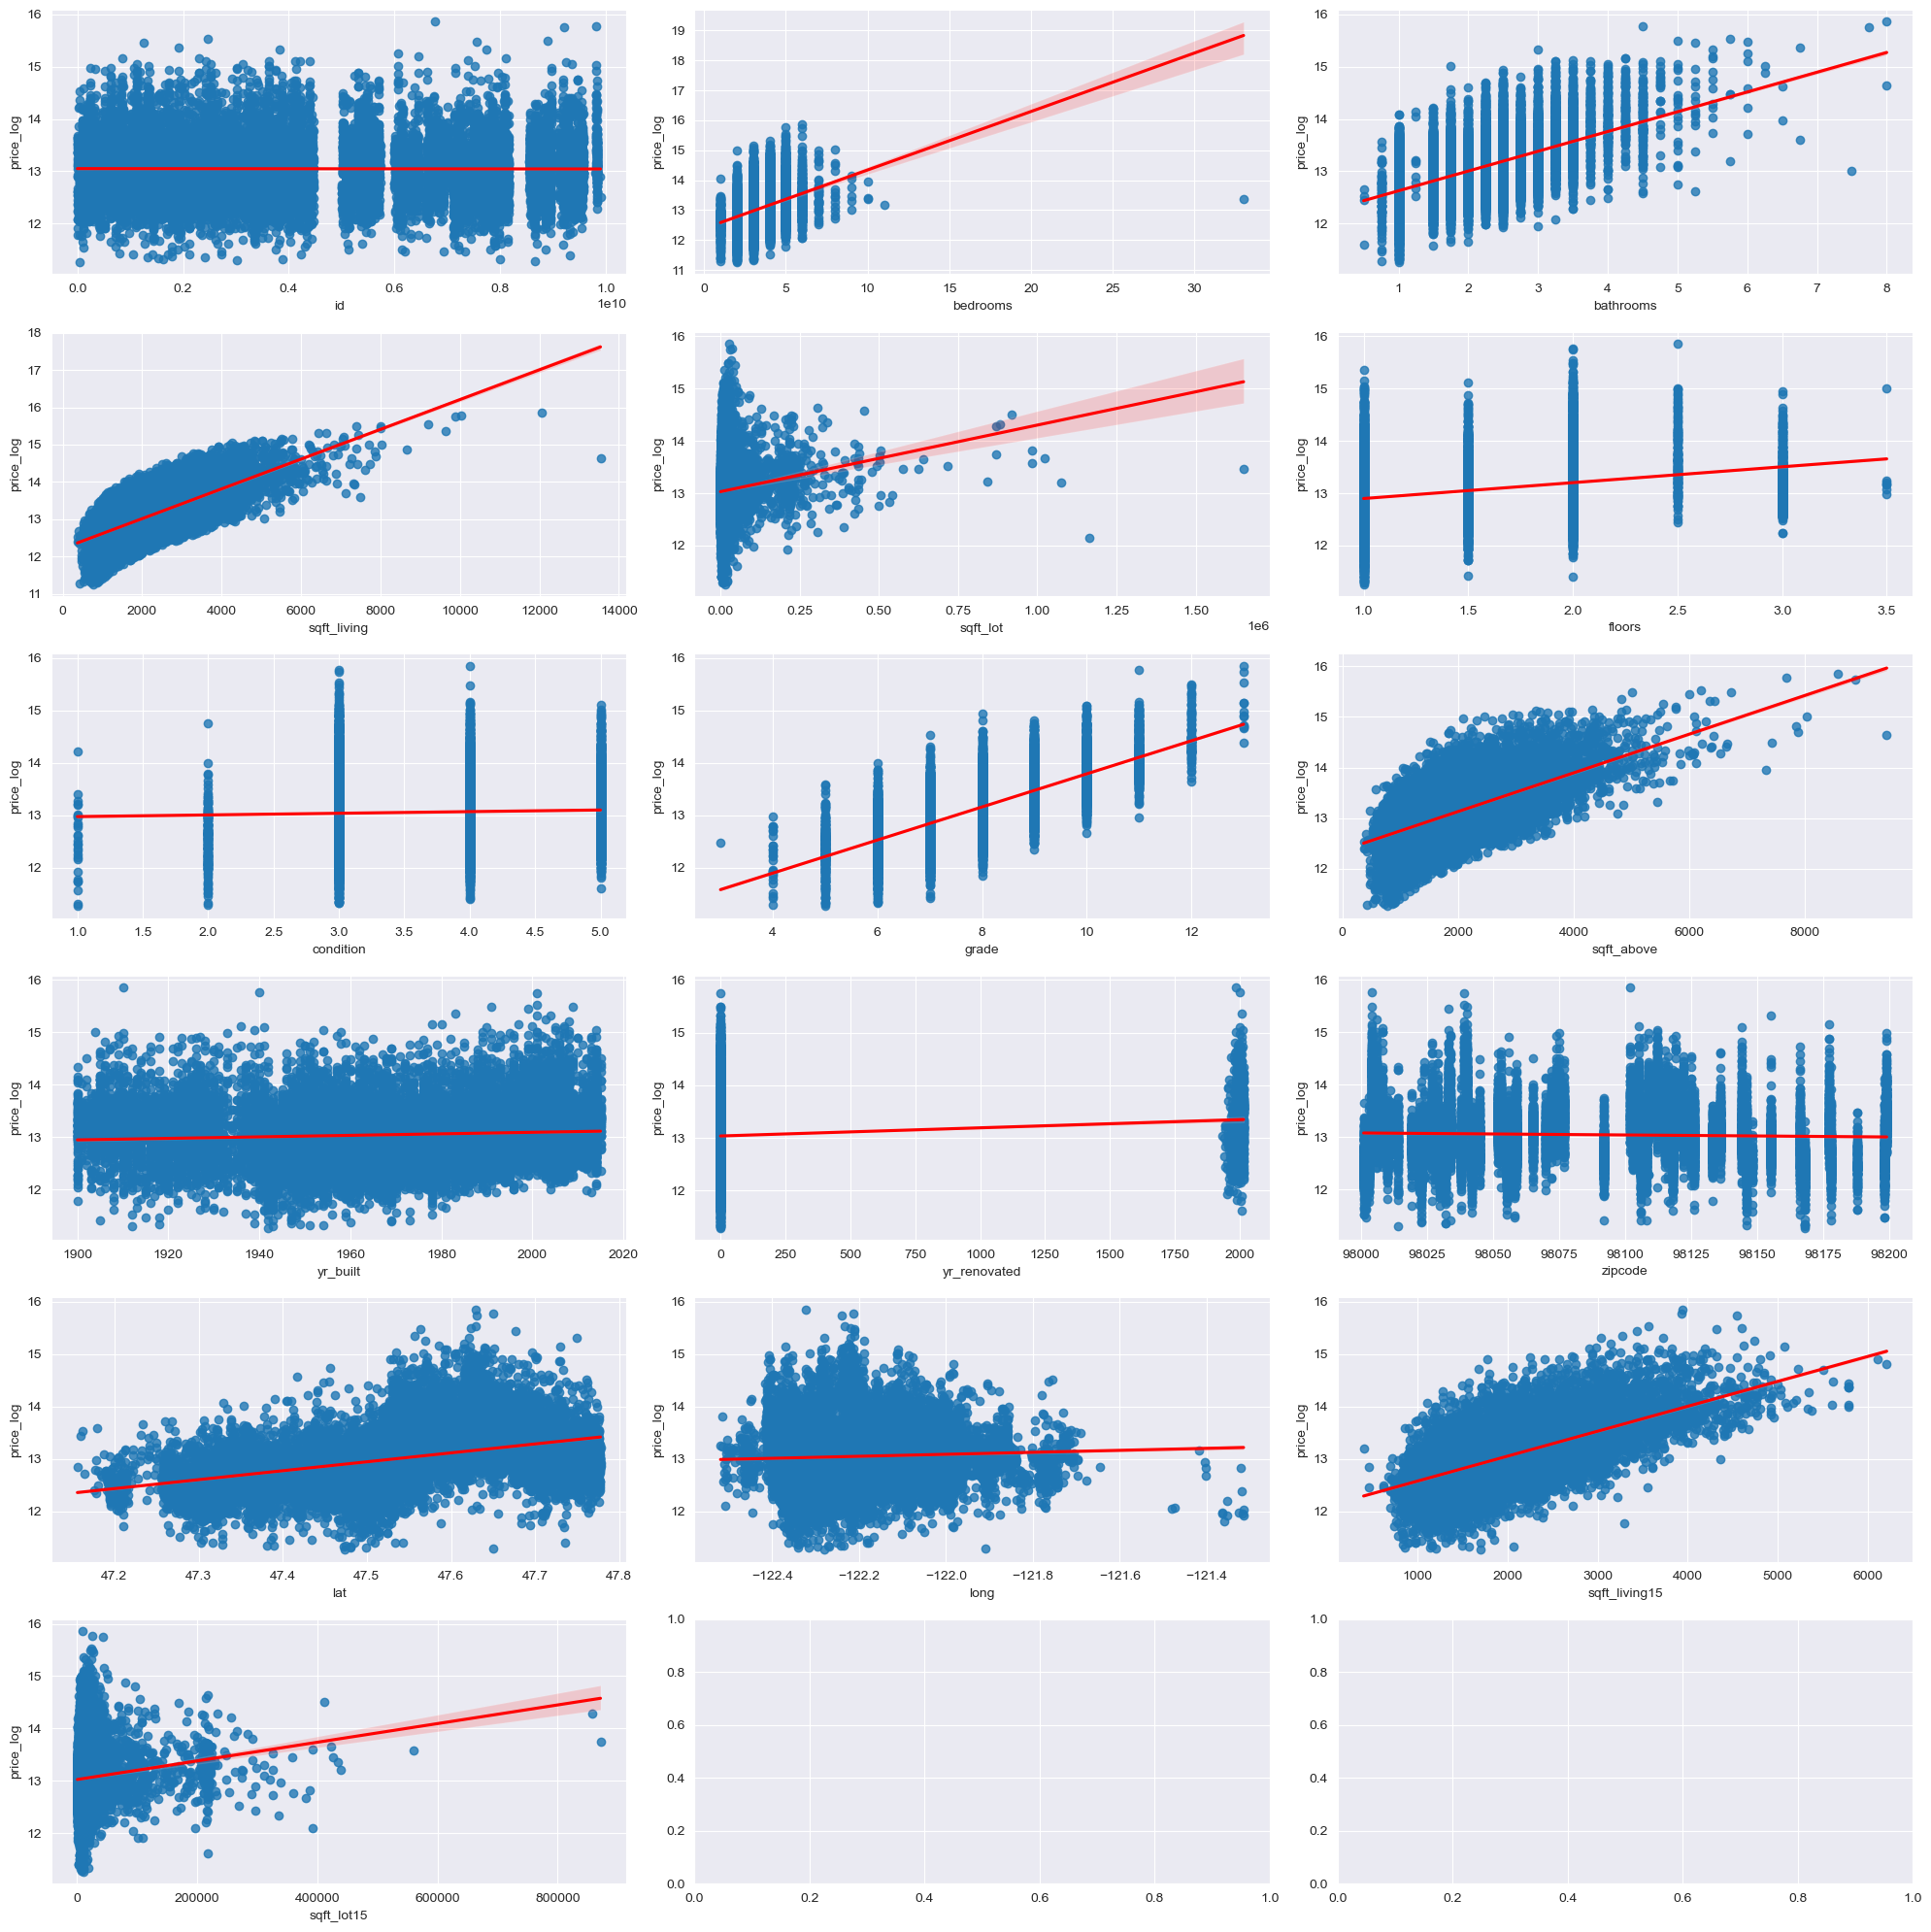

In [20]:
#looping over all columns  
plots = cont_df.drop(['price', 'price_log'], axis=1)

fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(20, 20))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = 'price_log', data = cont_df, ax=ax, line_kws={'color':'red'})
    ax.set_xlabel(col)
    ax.set_ylabel("price_log")

The presence of outliers in a number of columns is evident in the scatter plot. Perharps they are the outliers still observed after price was log normalized and as well the whisker sof the boxplot of price_log.
We could drop these rows and see if this minimises all the outliers in the other columns.

In [21]:
# helper function to remove outliers
def remove_outliers(df, column):
    return df[(np.abs(stats.zscore(df[column])) < 3)]

price_logged_no_out_df = remove_outliers(raw_df, "price_log")

# investigate repercussions of blanket outlier removal from price
all_price = len(raw_df["price_log"])
no_out = len(price_logged_no_out_df)
lost = all_price-no_out

print(f'Price feature currently has {all_price} values.')
print(f'If outliers removed it will have {no_out}.')
print(f'That means {lost} would be removed, or {(round(lost/all_price, 2))*100}% dropped.')


Price feature currently has 21597 values.
If outliers removed it will have 21428.
That means 169 would be removed, or 1.0% dropped.


<Axes: >

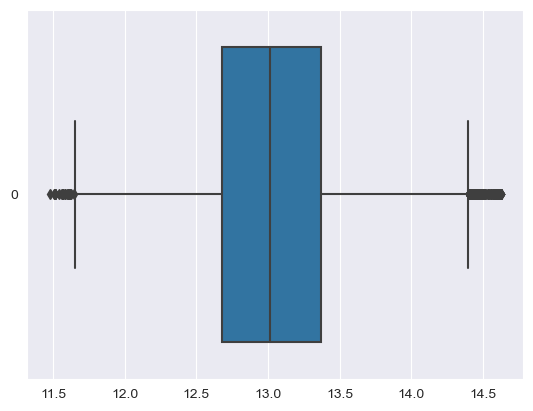

In [22]:
sns.boxplot(price_logged_no_out_df.price_log, orient="h")

Next we will export the cleaned normalized price dataset to work as an .xlsx file.

In [23]:
# Exporting the pandas df as Excel
price_logged_no_out_df.to_excel(r'CleanedPriceLog.xlsx', index=False)

With the cleaned price dataframe we test the assumptions of linear regression.
1. Linearity - there should be a relationship between independent and dependent varibales
2. Normal distribution of error term
3. Homoscedacity - constant error variance i.e the variance of the error term is same across all the independent varibales
4. No multicollinearity - independent variables are not correlated.

Next we create a copy of the price_logged_no_out_df to deal with the other numerical variables the sqft variables. THere is a significant gap in scaling which may afect results it would be necessary to transform these numerical variables following the linear regression assumption of homoscedacity of variables.

In [24]:
raw_df_copy = raw_df.copy()

In [25]:
# another dataframe with numerical variables with log transformation
log_vars = ["log_sqft_above", "log_sqft_living", "log_sqft_lot", "log_sqft_living15", "log_sqft_lot15"]

# log transforming
raw_df_copy[log_vars] = np.log(raw_df[["sqft_above", "sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15"]])

# drop the untransformed variables
raw_df_copy.drop(["sqft_above", "sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15"], axis=1, inplace=True)
raw_df_copy

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,zipcode,lat,long,has_basement,price_log,log_sqft_above,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1.0,0,NONE,3,7,...,98178,47.5112,-122.257,0,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411
1,6414100192,12/9/2014,538000.0,3,2.25,2.0,0,NONE,3,7,...,98125,47.7210,-122.319,1,13.195614,7.682482,7.851661,8.887653,7.432484,8.941022
2,5631500400,2/25/2015,180000.0,2,1.00,1.0,0,NONE,3,6,...,98028,47.7379,-122.233,0,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917
3,2487200875,12/9/2014,604000.0,4,3.00,1.0,0,NONE,5,7,...,98136,47.5208,-122.393,1,13.311329,6.956545,7.580700,8.517193,7.215240,8.517193
4,1954400510,2/18/2015,510000.0,3,2.00,1.0,0,NONE,3,8,...,98074,47.6168,-122.045,0,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,3.0,0,NONE,3,8,...,98103,47.6993,-122.346,0,12.793859,7.333023,7.333023,7.030857,7.333023,7.319202
21593,6600060120,2/23/2015,400000.0,4,2.50,2.0,0,NONE,3,8,...,98146,47.5107,-122.362,0,12.899220,7.745003,7.745003,8.667852,7.512071,8.881836
21594,1523300141,6/23/2014,402101.0,2,0.75,2.0,0,NONE,3,7,...,98144,47.5944,-122.299,0,12.904459,6.927558,6.927558,7.207860,6.927558,7.604396
21595,291310100,1/16/2015,400000.0,3,2.50,2.0,0,NONE,3,8,...,98027,47.5345,-122.069,0,12.899220,7.377759,7.377759,7.778211,7.251345,7.160069


In [26]:
# drop columns
raw_df_copy.drop(['id', 'date','yr_built', 'zipcode', 'yr_renovated', 'lat', 'long'], axis=1, inplace=True)
raw_df_copy

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,has_basement,price_log,log_sqft_above,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15
0,221900.0,3,1.00,1.0,0,NONE,3,7,0,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411
1,538000.0,3,2.25,2.0,0,NONE,3,7,1,13.195614,7.682482,7.851661,8.887653,7.432484,8.941022
2,180000.0,2,1.00,1.0,0,NONE,3,6,0,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917
3,604000.0,4,3.00,1.0,0,NONE,5,7,1,13.311329,6.956545,7.580700,8.517193,7.215240,8.517193
4,510000.0,3,2.00,1.0,0,NONE,3,8,0,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,3.0,0,NONE,3,8,0,12.793859,7.333023,7.333023,7.030857,7.333023,7.319202
21593,400000.0,4,2.50,2.0,0,NONE,3,8,0,12.899220,7.745003,7.745003,8.667852,7.512071,8.881836
21594,402101.0,2,0.75,2.0,0,NONE,3,7,0,12.904459,6.927558,6.927558,7.207860,6.927558,7.604396
21595,400000.0,3,2.50,2.0,0,NONE,3,8,0,12.899220,7.377759,7.377759,7.778211,7.251345,7.160069


### Multicollinearity test

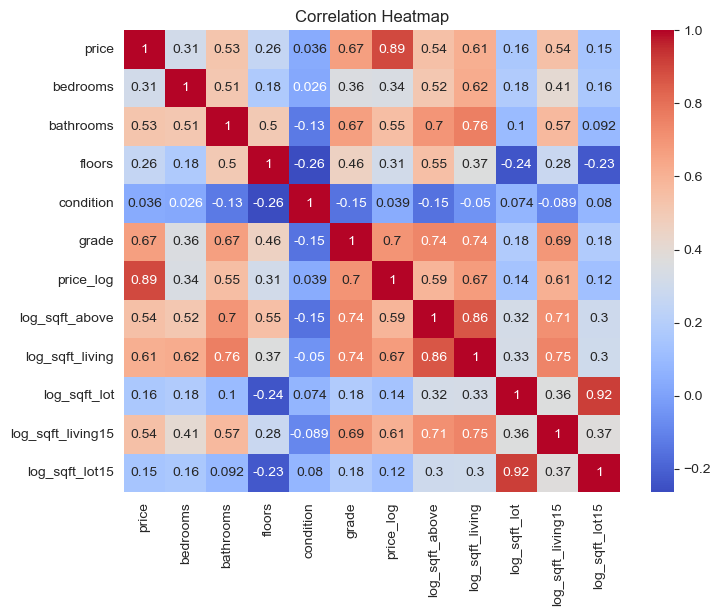

In [27]:
# multicollinearity test for varinace inflation factor
plt.figure(figsize=(8, 6))
sns.heatmap(raw_df_copy.corr(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# calculate VIF
def calc_VIF(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return (vif)

calc_VIF(raw_df_copy)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Final cleaned dataset

In [ ]:
# columns to drop

In [ ]:
# is there really a 30+ bedroom house?
cont_df['bedrooms'].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
# drop that 1 it's obviously an anomaly 
cont_df = cont_df[cont_df['bedrooms']<30]

IndexError: index 4 is out of bounds for axis 0 with size 4

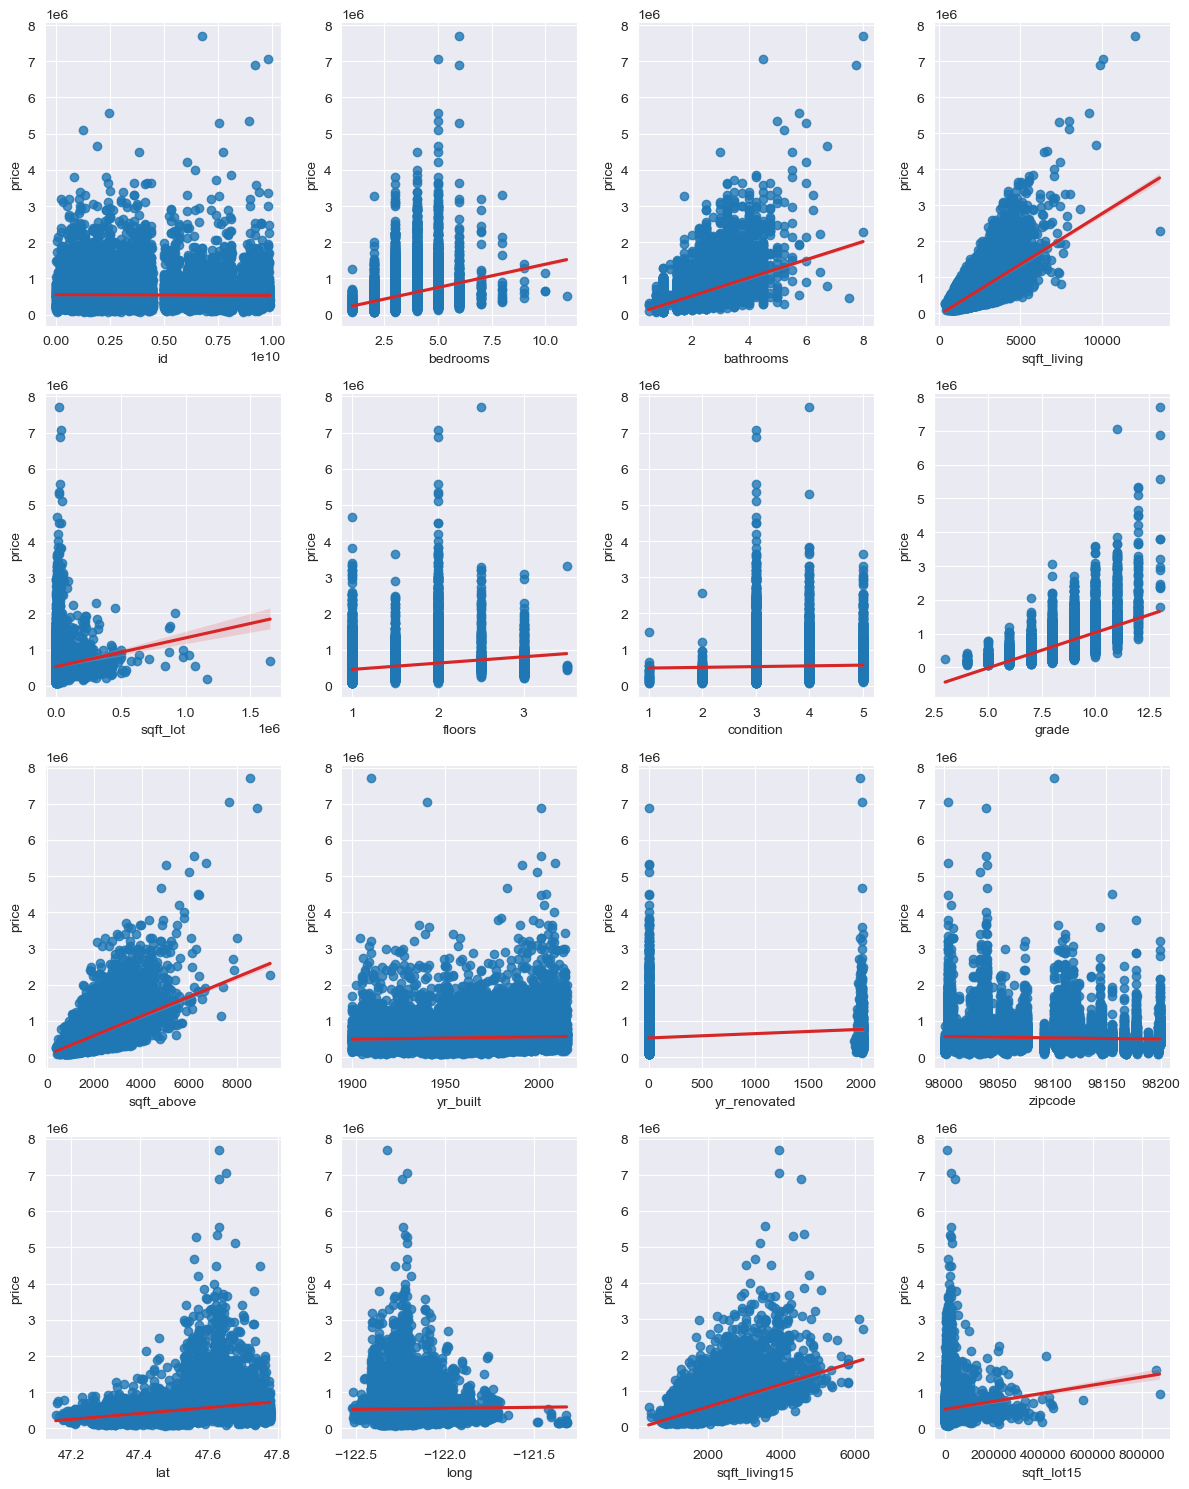

In [ ]:
#looping over all columns  
plots = cont_df.drop('price', axis=1)

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//4][index%4]
    sns.regplot(x = col, y = 'price', data = cont_df, ax=ax, line_kws={"color": "tab:red"})
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [ ]:
# see correlation between parameters and price
corr_matrix = raw_df.corr()
corr_matrix['price'].sort_values(ascending=False)

### Modelling

In [ ]:
# see correlation between parameters and price
# helps to select the baseline model
corr_matrix = raw_df.corr()
corr_matrix['price'].sort_values(ascending=False)

we opt to use the sqft_living as it has the highest correlation to the price of a property.

In [ ]:
#define x and y
y = raw_df['price']
X_linear = raw_df[['sqft_living']]

In [ ]:
#create baseline model
baseline_model = ols(y, sm.add_constant(X_linear))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

##### Model 1 Results: Sqft_living in relation to price
Looking at the summary above, the regression line we foundis

                `price^= −43990 + 280.8630sqftliving`
Our y intercept in Model 1 is -24,220.
The model is statistically significant, with an F-statistic p-value well below 0.05
The model (R-squared) explains about 48.5% of the variance in price.
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
If a house has sqft_living space of 0 feet squared, we would expect the price to be about USD -24,220
For each increase of 1 square foot in sqft_living space, the price increases by USD 270.16

### Regression Results

### Recommendations

### Next Steps